# Indian Liver Patient Records

#### ATTRIBUTE INFORMATION: 

This data set contains 416 liver patient records and 167 non-liver patient records. 
The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups (liver patient or not). This data set contains 441 male patient records and 142 female patient records. 


• Age of the patient: Any patient whose age exceeded 89 is listed as being of age "90

• Gender of the patient 

• TB Total Bilirubin: A bilirubin test measures the amount of bilirubin in your blood. It is used to help find the cause of health conditions like jaundice, anaemia, and liver disease. Bilirubin is an orangeyellow pigment that occurs normally when part of your red blood cells break down. 

• DB Direct Bilirubin: Higher than normal levels of bilirubin may indicate different types of liver problems.

• Alkphos Alkaline Phosphotase: If you show signs of liver disease or a bone disorder, your doctor may order an alkaline phosphatase (ALP) test to measure the amount of the enzyme in your blood and help in diagnosing the problem.

• Sgpt Alamine Aminotransferase: The alanine aminotransferase (ALT) test is a blood test that checks for liver damage.

• Sgot Aspartate Aminotransferase: AST is an enzyme your liver makes. Other organs, like your heart, kidneys, brain, and muscles, also make smaller amounts. AST is also called SGOT. • TP Total Protiens

• ALB Albumin: An albumin blood test is a type of liver function test. Liver function tests are blood tests that measure different enzymes and proteins in the liver, including albumin. An albumin test may also be part of a comprehensive metabolic panel, a test that measures several substances in your blood.

• A/G Ratio Albumin and Globulin Ratio 

• Selector field used to split the data into two sets (labeled by the experts): Selector is a class label used to divide into groups(liver patient or not).

In [1]:
#impoting Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import math
import random
#Rest of the libraries will be imported where ever necesary

In [3]:
#Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [4]:
df=pd.read_csv('D:\\M. Tech in Data Science & Machine Learning\\Machine Learning 2\\Sem_preparation\\indian_liver_patient\\indian_liver_patient.csv')
df.head()#first 5 records

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.tail()#last 5 records

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [6]:
#2.i) Explore the types of variables (continuous, categorical etc.)

In [7]:
df.shape #583 records and 11 variables

(583, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
df_cat=df.select_dtypes(include='object')
len(df_cat.columns)# 1 categorical column

1

In [10]:
df_num=df.select_dtypes(include='number')
len(df_num.columns)#10 numerical columns

10

In [11]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 45.7 KB


In [12]:
#we have 5 integer columns and 5 bollean columns

In [13]:
#2.ii) #Calculate five point summary for numerical variables. 
#Summarize observations for categorical variables – no. of categories, % observations in each category.

In [14]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [15]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [16]:
#There are  numeric features and 1 output variable 
#Value 1 indicates that the patient has liver disease and 2 indicates the patient does not have liver disease.

In [17]:
# we will just replace the value 2 to 0 for simpler calcualtion

In [18]:
df['Dataset'].replace(2,0,inplace=True)

In [19]:
df['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [20]:
#Value 1 indicates that the patient has liver disease and 0 indicates the patient does not have liver disease.

In [21]:
df_cat.describe()

,Gender
count,583
unique,2
top,Male
freq,441


In [22]:
df_cat.value_counts()

Gender
Male      441
Female    142
dtype: int64

In [23]:
#There are two unique elements in the categroical column:
#Male  are in total  441
#Female  are in total  142

In [24]:
#2.iii) Check for defects in the data. Perform necessary actions to ‘fix’ these defects.

In [25]:
# A. checking for missing values

In [26]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [27]:
# in the column "Albumin_and_Globulin_Ratio" there are 4 missing values

In [28]:
# % of missing values

In [29]:
(df.isnull().sum()/len(df))*100

Age                           0.000000
Gender                        0.000000
Total_Bilirubin               0.000000
Direct_Bilirubin              0.000000
Alkaline_Phosphotase          0.000000
Alamine_Aminotransferase      0.000000
Aspartate_Aminotransferase    0.000000
Total_Protiens                0.000000
Albumin                       0.000000
Albumin_and_Globulin_Ratio    0.686106
Dataset                       0.000000
dtype: float64

In [30]:
#fixing the missing values

In [31]:
df['Albumin_and_Globulin_Ratio'].describe()

count    579.000000
mean       0.947064
std        0.319592
min        0.300000
25%        0.700000
50%        0.930000
75%        1.100000
max        2.800000
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [32]:
df['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [33]:
df['Albumin_and_Globulin_Ratio'].median()

0.93

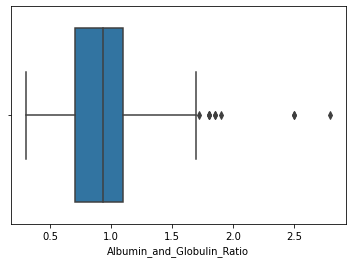

In [34]:
sns.boxplot(df['Albumin_and_Globulin_Ratio'])
plt.show()

In [35]:
# As the mean and median is almost the same...replace by mean

In [36]:
df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean(),inplace=True)

In [37]:
(df.isnull().sum()/len(df))*100

Age                           0.0
Gender                        0.0
Total_Bilirubin               0.0
Direct_Bilirubin              0.0
Alkaline_Phosphotase          0.0
Alamine_Aminotransferase      0.0
Aspartate_Aminotransferase    0.0
Total_Protiens                0.0
Albumin                       0.0
Albumin_and_Globulin_Ratio    0.0
Dataset                       0.0
dtype: float64

In [38]:
#Null values have been replaced

In [39]:
#B.outliers

In [40]:
df_num.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1


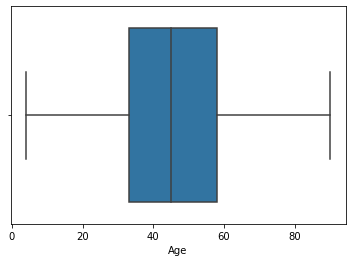

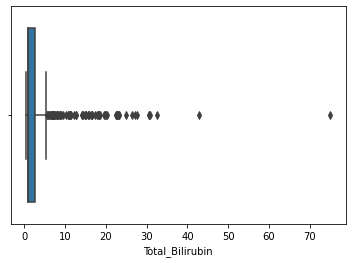

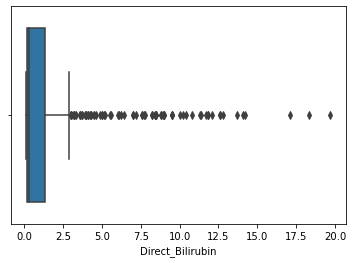

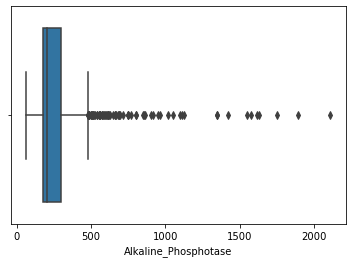

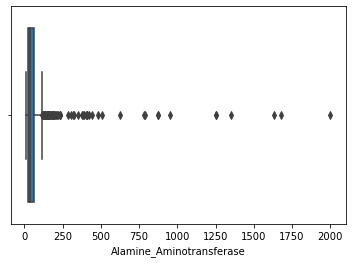

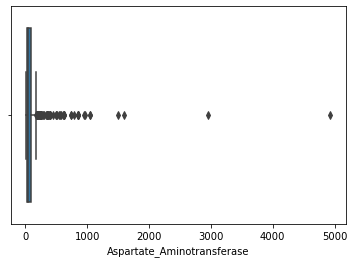

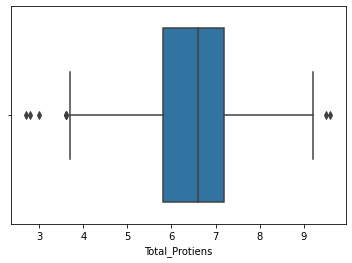

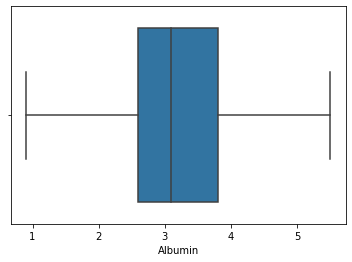

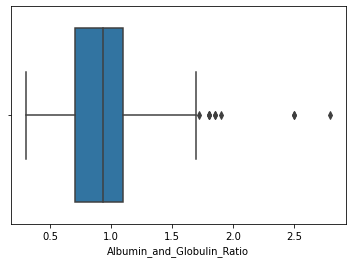

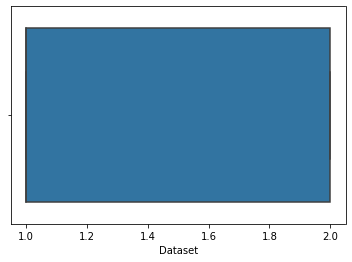

In [41]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.show()

In [42]:
#There are outliers in some variables, we will go ahead with the outliers if necesasry will perofrm IQR if Reuired

In [43]:
#2.iV)
#Plot relevant categorical plots. 
#Find out which are the variables most correlated or appear to be in causation with Target? 
#Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

In [44]:
#2.V)
#Plot all independent variables with the target & find out the relationship?
#Perform the Relevant Tests to find out if the Independent variables are associated with the Target Variable.

<Figure size 1440x720 with 0 Axes>

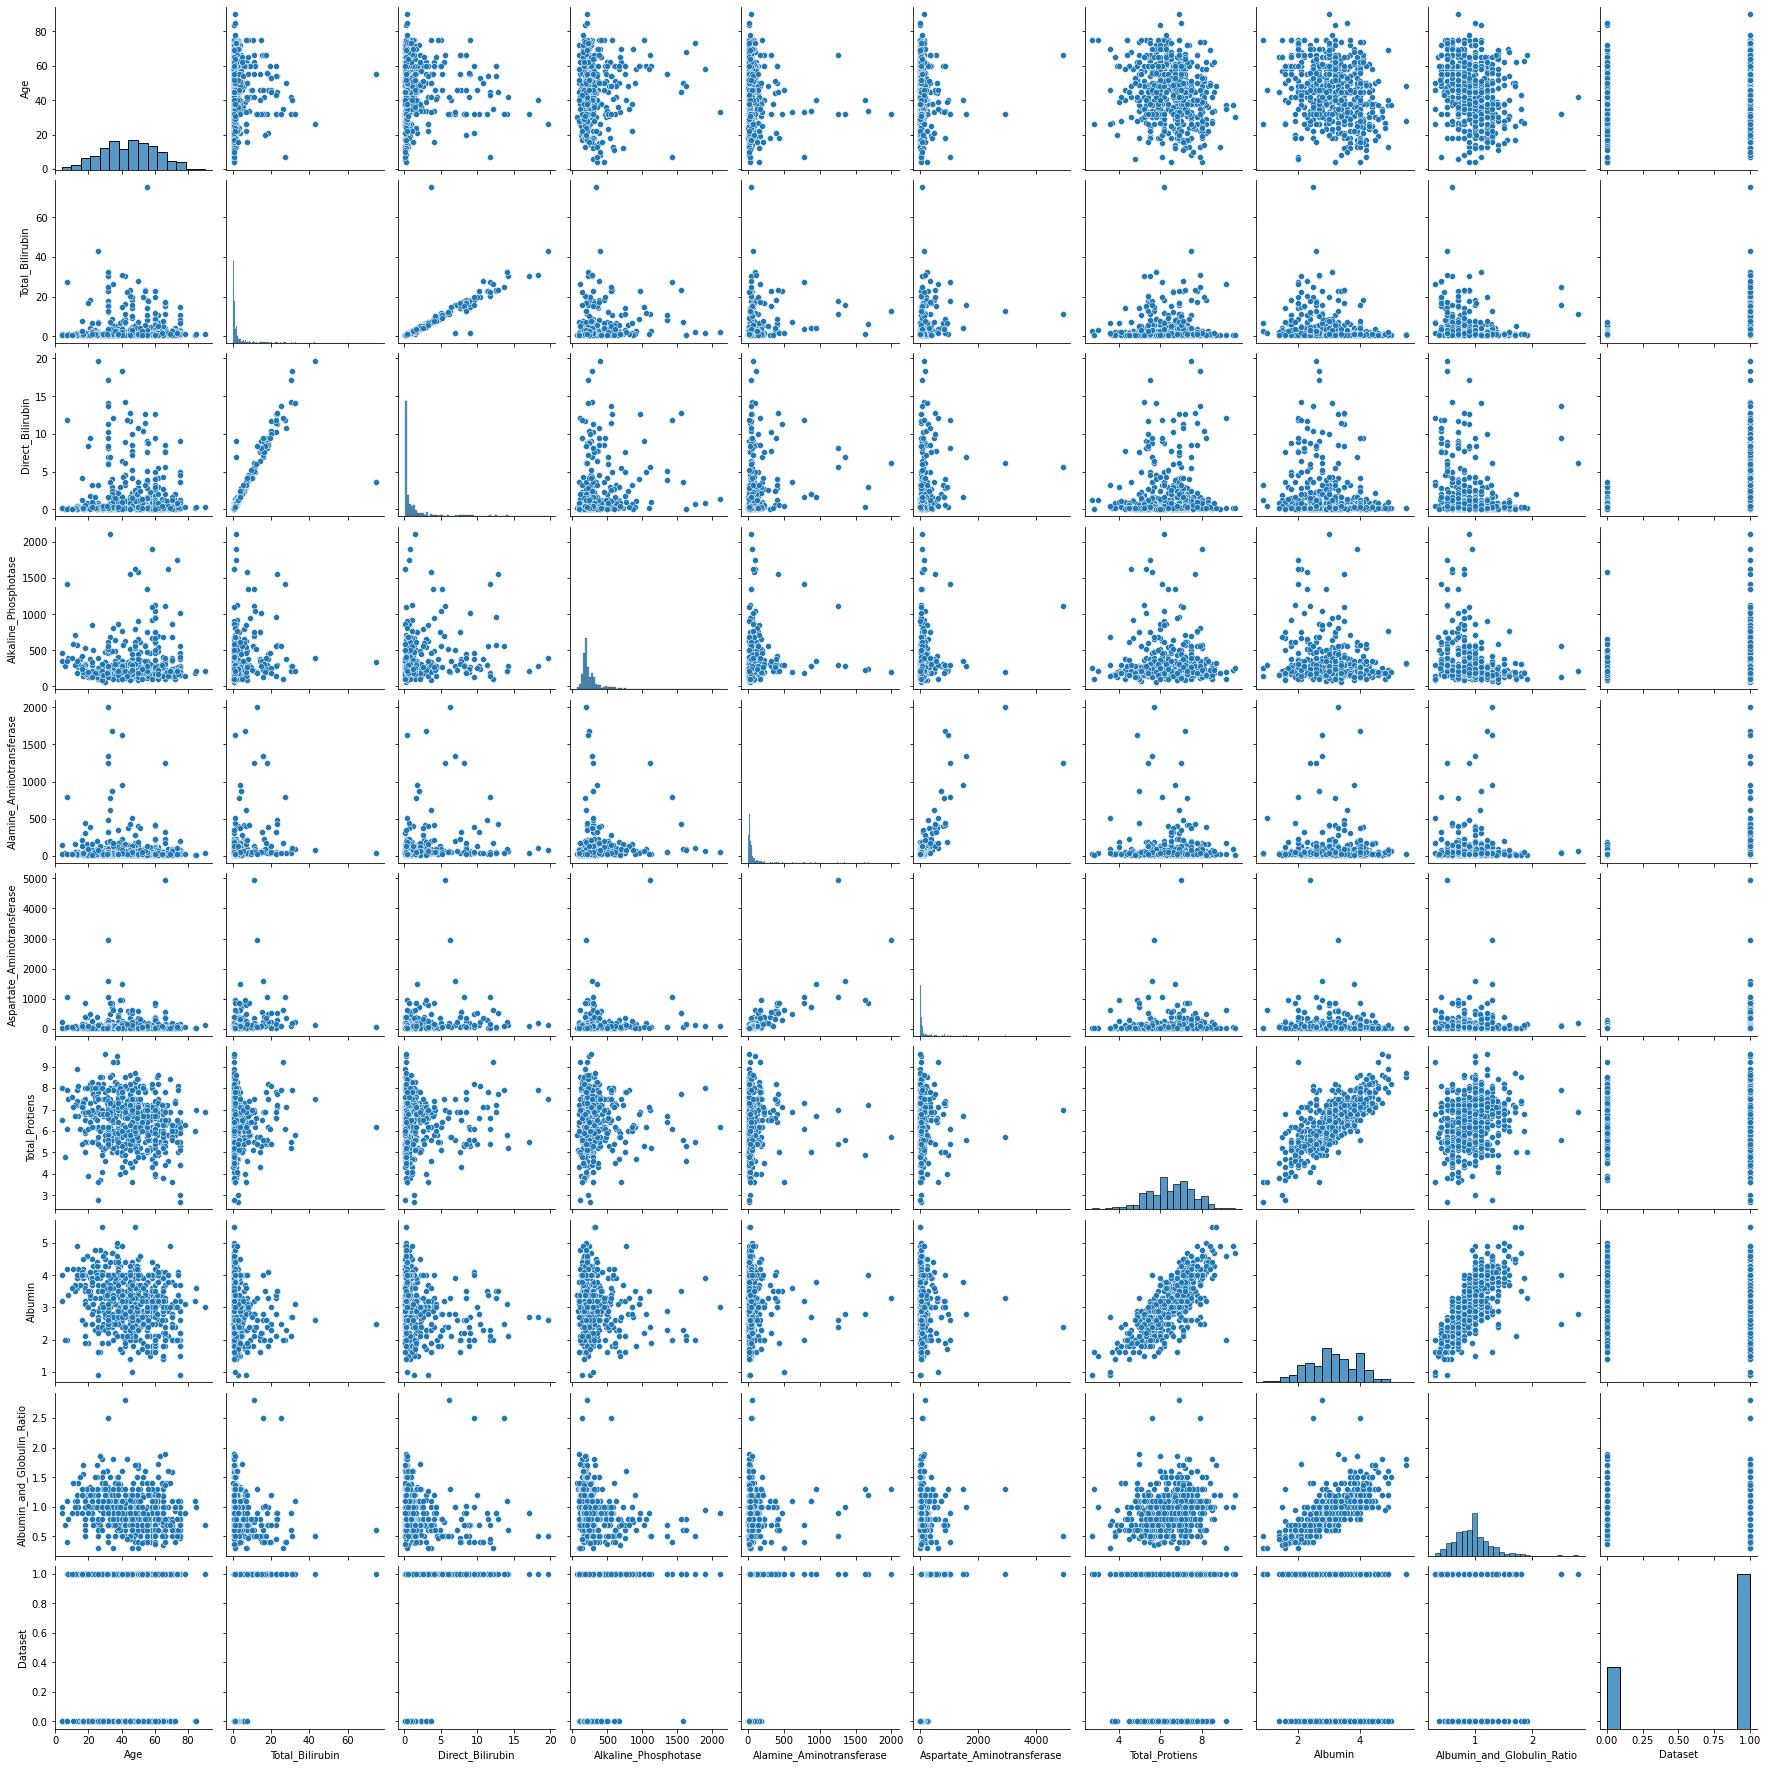

In [45]:
plt.figure(figsize=(20, 10))
sns.pairplot(df)
plt.show()

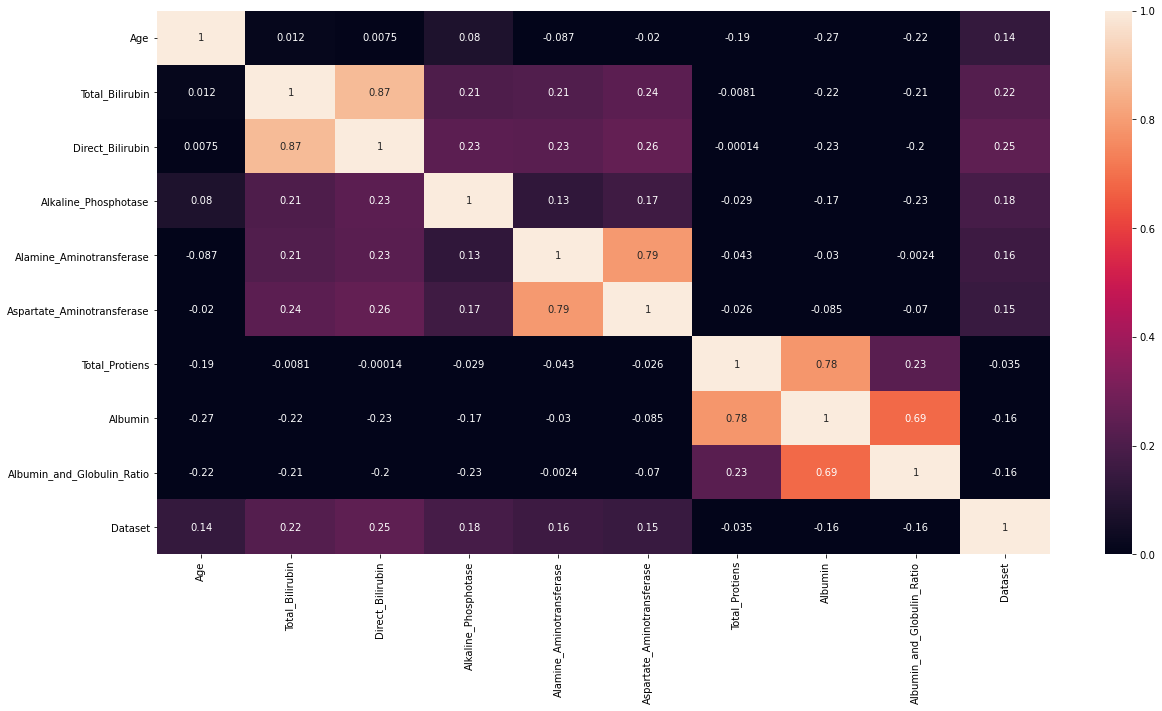

In [46]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1)
plt.show()

In [47]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [48]:
## Direct_Bilirubin and Total_Bilirubin have good positive corelation of 0.87
## Total_Protiens and Albumin have good positive corelation of 0.78
## Albumin and Albumin_and_Globulin_Ratio have good positive corelation of 0.69
## By now, we can say that we need to use all the columns as we can't drop any on the basis of corealtion

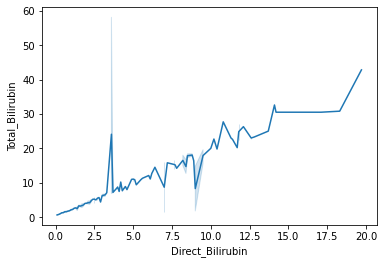

In [49]:
sns.lineplot(x='Direct_Bilirubin',y='Total_Bilirubin',data=df)
plt.show()

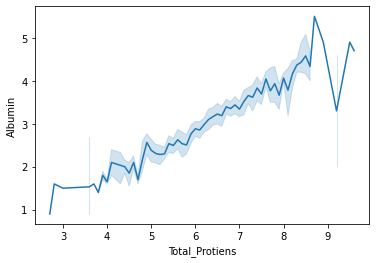

In [50]:
sns.lineplot(x='Total_Protiens',y='Albumin',data=df)
plt.show()

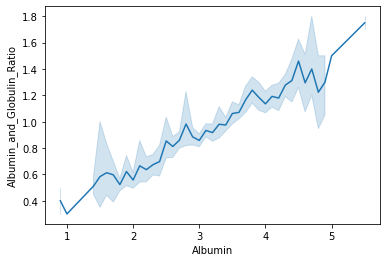

In [51]:
sns.lineplot(x='Albumin',y='Albumin_and_Globulin_Ratio',data=df)
plt.show()

In [52]:
df['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

In [53]:
#Value 1 indicates that the patient has liver disease and 0 indicates the patient does not have liver disease.

Number of patients diagnosed with liver disease:  416
Number of patients not diagnosed with liver disease:  167


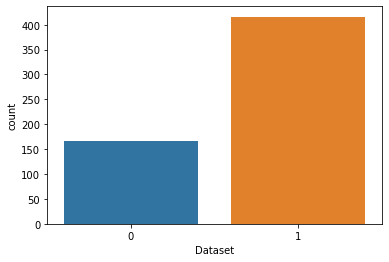

In [54]:
sns.countplot(data=df, x = 'Dataset', label='Count')

LD, NLD = df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [55]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

Number of patients that are male:  441
Number of patients that are female:  142


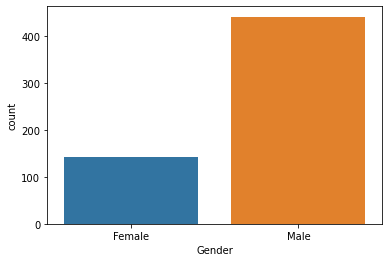

In [56]:
sns.countplot(data=df, x = 'Gender', label='Count')

M, F = df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

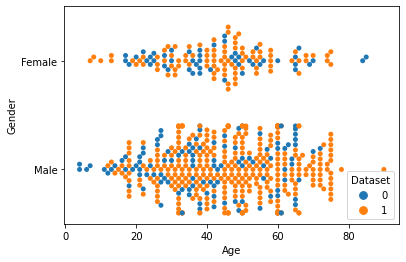

In [57]:
sns.swarmplot(x="Age", y="Gender", hue="Dataset", data=df)
plt.show()

In [58]:
#2.iV)Split dataset into train and test (70:30).Are both train and test representative of the overall data?
#How would you ascertain this statistically?

In [59]:
df1=df.copy()#making copy of the orignal dataframe

In [60]:
df1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [61]:
df1['Gender'].replace('Female',0,inplace=True)
df1['Gender'].replace('Male',1,inplace=True)

In [62]:
df1.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [63]:
X=df1.drop('Dataset',axis=1)
Y=df1['Dataset']

In [64]:
Y.value_counts()#data is imbalanced

1    416
0    167
Name: Dataset, dtype: int64

In [65]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X1, Y1 = sm.fit_resample(X, Y)
Y1.value_counts()

0    416
1    416
Name: Dataset, dtype: int64

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,random_state=2,test_size=0.30)

In [68]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(582, 10)
(250, 10)
(582,)
(250,)


In [69]:
#3.i)
#Build the base model and explain the reason of selecting that model. What is the overall accuracy?Also comment whether it is good or bad.

In [70]:
#Model building

In [71]:
#Model 1

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knc=KNeighborsClassifier(n_neighbors=3)
KNeighbors_Classifier=knc.fit(X_train,Y_train)

In [75]:
knc_pred=KNeighbors_Classifier.predict(X_test)

In [76]:
print(classification_report(knc_pred,Y_test))

              precision    recall  f1-score   support

           0       0.75      0.70      0.73       125
           1       0.72      0.77      0.74       125

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.74      0.74      0.74       250



In [77]:
confusion_matrix(knc_pred,Y_test)

array([[88, 37],
       [29, 96]], dtype=int64)

In [78]:
accuracy_score(knc_pred,Y_test)

0.736

In [79]:
#ROC Curve

In [80]:
import sklearn.metrics as metrics

In [81]:
fpr, tpr, threshold = metrics.roc_curve(knc_pred,Y_test)#Compute Receiver operating characteristic (ROC)
roc_auc = metrics.auc(fpr, tpr)#Compute Area Under the Curve (AUC)

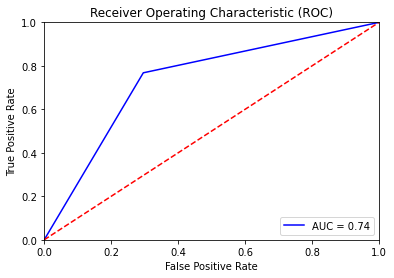

In [82]:
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [83]:
#Interpretation: 
#The red dotted line represents the ROC curve of a purely random classifier; 
#a good classifier stays as far away from that line as possible (toward the top-left corner).

#From the above plot, we can see that our classifier (KNeighborsClassifier) is away from the red dotted line; 
#with the AUC score 0.74.

In [84]:
#Model 2

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dtc=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=2)
Decision_Tree_Classifier=dtc.fit(X_train,Y_train)

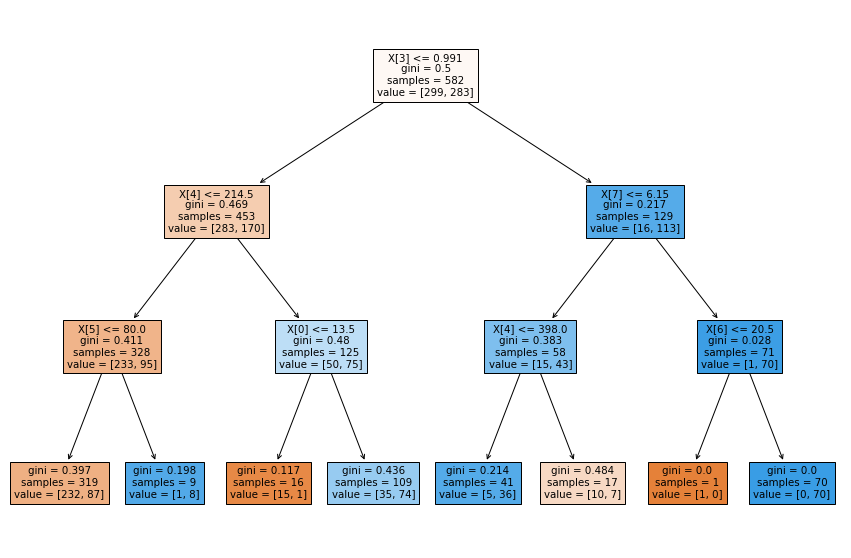

In [87]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(Decision_Tree_Classifier,filled=True)
plt.show()

In [88]:
dtc_pred=Decision_Tree_Classifier.predict(X_test)

In [89]:
print(classification_report(Y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.61      0.73      0.66       117
           1       0.71      0.59      0.65       133

    accuracy                           0.66       250
   macro avg       0.66      0.66      0.66       250
weighted avg       0.66      0.66      0.66       250



In [90]:
confusion_matrix(Y_test,dtc_pred)

array([[85, 32],
       [54, 79]], dtype=int64)

In [91]:
accuracy_score(Y_test,dtc_pred)

0.656

In [92]:
#ROC Curve

In [93]:
fpr, tpr, threshold = metrics.roc_curve(Y_test,dtc_pred)#Compute Receiver operating characteristic (ROC)
roc_auc = metrics.auc(fpr, tpr)#Compute Area Under the Curve (AUC)

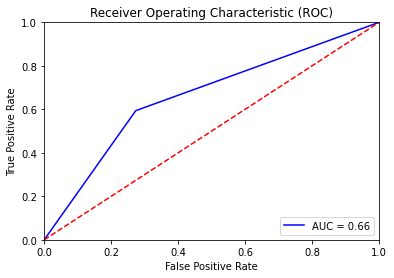

In [94]:
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [95]:
#From the above plot, we can see that our classifier (DecisionTreeClassifier) is very close to the red dotted line; 
#with the AUC score 0.66.

In [96]:
#Model 3

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc=RandomForestClassifier()
Random_Forest_Classifier=rfc.fit(X_train,Y_train)

In [99]:
rfc_pred=Random_Forest_Classifier.predict(X_test)

In [100]:
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       117
           1       0.82      0.78      0.80       133

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



In [101]:
accuracy_score(Y_test,rfc_pred)

0.792

In [102]:
confusion_matrix(Y_test,rfc_pred)

array([[ 94,  23],
       [ 29, 104]], dtype=int64)

In [103]:
#ROC Curve

In [104]:
fpr, tpr, threshold = metrics.roc_curve(Y_test,rfc_pred)#Compute Receiver operating characteristic (ROC)
roc_auc = metrics.auc(fpr, tpr)#Compute Area Under the Curve (AUC)

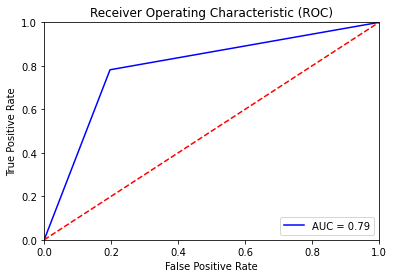

In [105]:
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
#From the above plot, we can see that our classifier (RandomForestClassifier) is away the red dotted line; 
#with the AUC score 0.79.

In [107]:
#3.ii)
#What is Precision, Recall and F1 Score and what will be the optimization objective keeping in mind the problem statement?
#Which variables are significant? Which other key model output parameters do you want to look at?

In [108]:
# We have constructed 3 models

#1. KNeighborsClassifier
#2. DecisionTreeClassifier
#3. RandomForestClassifier

In [109]:
#1. KNeighborsClassifier

#The precison of the model is 75% with a recall value of 70% #F1-score is 73% 
#Accuracies and other metrics can be improved by applying better ensemble and boosting models.

#Cohens kappa - The kappa statistic is frequently used to test interrater reliability. 
               #The importance of rater reliability lies in the fact that it #represents 
            #the extent to which the data collected in the study are correct representations of the variables measured.

In [110]:
#2. DecisionTreeClassifier

#The precison of the model is 73% with a recall value of 61%  and F1-score is 66% 
#Accuracies and other metrics can be improved by applying better ensemble and boosting models.

#Cohens kappa - The kappa statistic is frequently used to test interrater reliability. 
               #The importance of rater reliability lies in the fact that it #represents 
            #the extent to which the data collected in the study are correct representations of the variables measured.

In [111]:
#3. RandomForestClassifier

#The precison of the model is 78% with a recall value of 78%  and F1-score is 78% 
#Accuracies and other metrics can be improved by applying better ensemble and boosting models.

#Cohens kappa - The kappa statistic is frequently used to test interrater reliability. 
               #The importance of rater reliability lies in the fact that it #represents 
            #the extent to which the data collected in the study are correct representations of the variables measured.

In [112]:
##3.iii)
#How do you improve overall efficiency of the model?
#Write clearly the changes that you will make before re-fitting the model. Fit the final model.

In [113]:
#As we have got a better result for KNN classifier with respect to other we will go ahead with KNN

In [114]:
#firstly checking if the model is overfitted or not

In [115]:
knc_pred_train=KNeighbors_Classifier.predict(X_train)

In [116]:
print(classification_report(Y_train,knc_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       299
           1       0.94      0.76      0.84       283

    accuracy                           0.86       582
   macro avg       0.87      0.86      0.86       582
weighted avg       0.87      0.86      0.86       582



In [117]:
#Training accuracy: 86%
#Testing accuracy:  74%(base model for KNN)

#Model is little overfitted

In [118]:
#Optimal value of k using GridSearchCV (KNN classifier)

In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}

In [121]:
knn_classification1 = KNeighborsClassifier()

knn_grid1 = GridSearchCV(estimator = knn_classification1, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')


knn_grid1.fit(X_train, Y_train)

print('Best parameters for KNN Classifier: ', knn_grid1.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'manhattan', 'n_neighbors': 1} 



In [122]:
knc1=KNeighborsClassifier(n_neighbors=1,metric='manhattan')
KNeighbors_Classifier1=knc1.fit(X_train,Y_train)

In [123]:
knc_pred1=KNeighbors_Classifier1.predict(X_test)

In [124]:
print(classification_report(knc_pred1,Y_test))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       134
           1       0.69      0.79      0.74       116

    accuracy                           0.74       250
   macro avg       0.74      0.74      0.74       250
weighted avg       0.75      0.74      0.74       250



In [125]:
confusion_matrix(knc_pred1,Y_test)

array([[93, 41],
       [24, 92]], dtype=int64)

In [126]:
accuracy_score(knc_pred1,Y_test)

0.74

In [127]:
#Also we we try to check for decision tree classifer if the model is overfitted or not

In [128]:
dtc_pred_train=Decision_Tree_Classifier.predict(X_train)

In [129]:
print(classification_report(Y_train,dtc_pred_train))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       299
           1       0.82      0.66      0.73       283

    accuracy                           0.77       582
   macro avg       0.78      0.76      0.76       582
weighted avg       0.77      0.77      0.76       582



In [130]:
confusion_matrix(Y_train,dtc_pred_train)

array([[258,  41],
       [ 95, 188]], dtype=int64)

In [131]:
accuracy_score(Y_train,dtc_pred_train)

0.7663230240549829

In [132]:
#Training accuracy: 76%
#Testing accuracy:  66% (base model for decision tree)

In [133]:
#model is little overfitted

In [134]:
#Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [135]:
from sklearn.model_selection import GridSearchCV

In [136]:
# Gini & Entropy - GridSearch
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10)
                     }]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)


tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, Y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 3} 



In [137]:
#Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [138]:
decision_tree_classification1=DecisionTreeClassifier(criterion = 'gini', max_depth= 9,min_samples_split= 3)

In [139]:
decision_tree_Grid=decision_tree_classification1.fit(X_train,Y_train)

In [140]:
dtc_pred_grid=decision_tree_Grid.predict(X_test)

In [141]:
print(classification_report(Y_test, dtc_pred_grid))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       117
           1       0.76      0.68      0.72       133

    accuracy                           0.72       250
   macro avg       0.72      0.72      0.72       250
weighted avg       0.72      0.72      0.72       250



In [142]:
accuracy_score(Y_test, dtc_pred_grid)

0.716

In [143]:
confusion_matrix(Y_test, dtc_pred_grid)

array([[88, 29],
       [42, 91]], dtype=int64)

In [144]:
#after applying grid search for two models

#decision tree classifier accuracy : 73%
#KNeighborsClassifier accuracy : 74%

In [145]:
#3.iii)
#Summarize the overall fit of the model and list down the measures to prove that it is a good model
#Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.	

In [146]:
#Building One more model

In [147]:
from xgboost import XGBClassifier

In [148]:
xgb=XGBClassifier(max_depth = 10, gamma = 1)
XGB_Classifier=xgb.fit(X_train,Y_train)

[13:22:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [149]:
xgb_pred=XGB_Classifier.predict(X_test)

In [150]:
print(classification_report(xgb_pred,Y_test))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74       114
           1       0.79      0.77      0.78       136

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.76      0.76      0.76       250



In [151]:
confusion_matrix(xgb_pred,Y_test)

array([[ 86,  28],
       [ 31, 105]], dtype=int64)

In [152]:
accuracy_score(xgb_pred,Y_test)

0.764

In [153]:
#Checkinf if the model is overfitted

In [154]:
xgb_pred_train=XGB_Classifier.predict(X_train)

In [155]:
print(classification_report(xgb_pred_train,Y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       1.00      1.00      1.00       283

    accuracy                           1.00       582
   macro avg       1.00      1.00      1.00       582
weighted avg       1.00      1.00      1.00       582



In [156]:
confusion_matrix(xgb_pred_train,Y_train)

array([[299,   0],
       [  0, 283]], dtype=int64)

In [157]:
accuracy_score(xgb_pred_train,Y_train)

1.0

In [158]:
#Model is overfitted

In [159]:
#Tune the Hyperparameters (GridSearchCV)

In [160]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(2,5),
                     'gamma': [0, 1, 2, 3, 4]}

In [161]:
xgb_model1 = XGBClassifier()

xgb_grid1 = GridSearchCV(estimator = xgb_model1, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid1.fit(X_train, Y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid1.best_params_, '\n')

[13:22:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:22:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [162]:
xgb_model2 = XGBClassifier(max_depth = 4, gamma = 0,learning_rate= 0.3)

# fit the model using fit() on train data
XGBoost2=xgb_model2.fit(X_train, Y_train)

[13:23:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [163]:
xgb_preds_3 = XGBoost2.predict(X_test)

In [164]:
print(classification_report(Y_test, xgb_preds_3))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       117
           1       0.79      0.76      0.77       133

    accuracy                           0.76       250
   macro avg       0.76      0.76      0.76       250
weighted avg       0.77      0.76      0.76       250



In [165]:
confusion_matrix(Y_test, xgb_preds_3)

array([[ 90,  27],
       [ 32, 101]], dtype=int64)

In [166]:
accuracy_score(Y_test, xgb_preds_3)

0.764

In [167]:
#feature Importance for XGBoost model

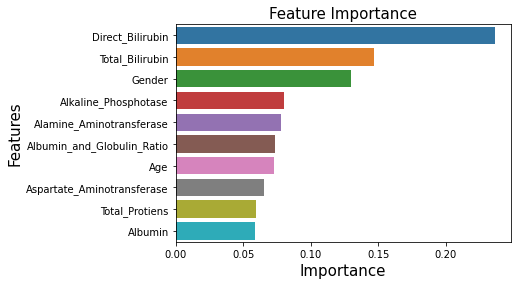

In [168]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': XGBoost2.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [169]:
#3.iV)What changes from the base model had the most effect on model performance?

In [170]:
#Applying Gridserach on models helps in finding the optimum values to pass and and more consistent to get better performance
#in the model

In [ ]:
#-----------------------------------------------------END----------------------------------------------------#